<a href="https://colab.research.google.com/github/Bha-nu12/Crowd-Detection-for-Kannada-Rajyotsava/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading and displaying sample image and annotations for: 32.jpg
Image shape: (680, 1024, 3)
.h5 density map shape: (680, 1024)
.h5 density map sum (approximate crowd count): 555.6280517578125
.mat annotations shape (number of points, 2): (562, 2)
.mat annotations (sample): [[126.51993092 550.5425793 ]
 [163.15025907 480.07625806]
 [ 56.80414508 401.388866  ]
 [ 78.07336788 394.34223388]
 [128.88317789 334.44586082]]


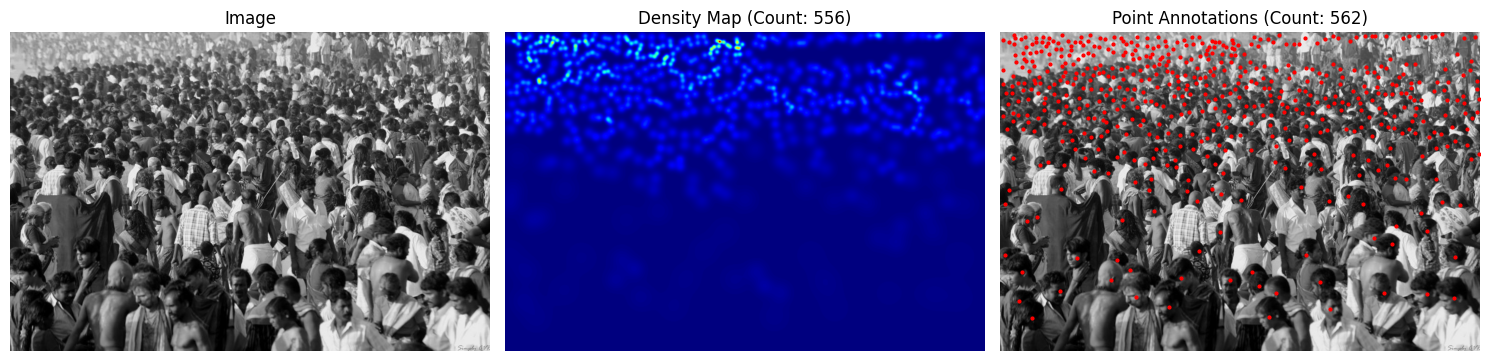

In [3]:
import os
import random
import h5py
import scipy.io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to the dataset directories
dataset_base_dir = '/content/crowd_counting_dataset'
train_images_dir = os.path.join(dataset_base_dir, 'train', 'images')
train_labels_h5_dir = os.path.join(dataset_base_dir, 'train', 'labels_h5')
train_labels_mat_dir = os.path.join(dataset_base_dir, 'train', 'labels_mat')

# Get a list of all image files in the training directory
image_files = [f for f in os.listdir(train_images_dir) if f.endswith('.jpg')]

if image_files:
    # Select a random image file
    sample_image_file = random.choice(image_files)
    sample_base_name = os.path.splitext(sample_image_file)[0]
    sample_image_path = os.path.join(train_images_dir, sample_image_file)
    sample_h5_path = os.path.join(train_labels_h5_dir, f'{sample_base_name}.h5')
    sample_mat_path = os.path.join(train_labels_mat_dir, f'{sample_base_name}_ann.mat')


    print(f"Loading and displaying sample image and annotations for: {sample_image_file}")

    # Load the image
    try:
        img = Image.open(sample_image_path).convert('RGB')
        img = np.array(img)
        print(f"Image shape: {img.shape}")
    except Exception as e:
        print(f"Error loading image {sample_image_file}: {e}")
        img = None

    # Load the .h5 annotation
    density_map = None
    if os.path.exists(sample_h5_path):
        try:
            with h5py.File(sample_h5_path, 'r') as f:
                density_map = np.array(f['density'])
            print(f".h5 density map shape: {density_map.shape}")
            print(f".h5 density map sum (approximate crowd count): {np.sum(density_map)}")
        except Exception as e:
            print(f"Error reading .h5 file {sample_h5_path}: {e}")
    else:
        print(f".h5 file not found for {sample_base_name}")


    # Load the .mat annotation
    mat_annotations = None
    if os.path.exists(sample_mat_path):
        try:
            mat_content = scipy.io.loadmat(sample_mat_path)
            if 'annPoints' in mat_content:
                mat_annotations = mat_content['annPoints']
                print(f".mat annotations shape (number of points, 2): {mat_annotations.shape}")
                print(f".mat annotations (sample): {mat_annotations[:5]}") # Display first 5 points
            else:
                 print(f"'annPoints' key not found in .mat file {sample_mat_file}")
        except Exception as e:
            print(f"Error reading .mat file {sample_mat_file}: {e}")
    else:
         print(f".mat file not found for {sample_base_name}")


    # Display the image and annotations
    plt.figure(figsize=(15, 5))

    if img is not None:
        plt.subplot(1, 3, 1)
        plt.imshow(img)
        plt.title('Image')
        plt.axis('off')

    if density_map is not None:
        plt.subplot(1, 3, 2)
        plt.imshow(density_map, cmap='jet') # Use a colormap suitable for density
        plt.title(f'Density Map (Count: {np.sum(density_map):.0f})')
        plt.axis('off')

    if mat_annotations is not None and img is not None:
        plt.subplot(1, 3, 3)
        plt.imshow(img)
        plt.plot(mat_annotations[:, 0], mat_annotations[:, 1], 'ro', markersize=2) # Plot points on the image
        plt.title(f'Point Annotations (Count: {mat_annotations.shape[0]})')
        plt.axis('off')
    elif mat_annotations is not None:
         # If image loading failed, just show the points (might not be very useful without image)
        plt.subplot(1, 3, 3)
        plt.plot(mat_annotations[:, 0], mat_annotations[:, 1], 'ro', markersize=2)
        plt.title(f'Point Annotations (Count: {mat_annotations.shape[0]})')
        # Adjust plot limits if needed, based on expected image size
        plt.xlim(0, img.shape[1] if img is not None else 1000) # Assuming image width
        plt.ylim(img.shape[0] if img is not None else 1000, 0) # Assuming image height, invert y-axis
        plt.gca().set_aspect('equal', adjustable='box') # Maintain aspect ratio
        plt.axis('off')


    plt.tight_layout()
    plt.show()

else:
    print("No image files found in the training images directory.")

You can use the following code to upload an image file from your local computer to your Colab environment:

In [21]:
from google.colab import files
import os

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'User uploaded file "{filename}"')
    # The uploaded file is now available in the /content/ directory

# Assuming you uploaded a single image file, you can get its path like this:
# uploaded_image_path = os.path.join('/content/', list(uploaded.keys())[0])
# print(f"Uploaded image path: {uploaded_image_path}")

Saving WhatsApp Image 2025-10-17 at 13.40.01_e7fcce76.jpg to WhatsApp Image 2025-10-17 at 13.40.01_e7fcce76 (1).jpg
User uploaded file "WhatsApp Image 2025-10-17 at 13.40.01_e7fcce76 (1).jpg"


Once you have uploaded your image, you can use the previously defined `predict_crowd_count` function to get the crowd count and optionally visualize the density map.

Remember to replace `input_image_path` in the example usage with the path to your uploaded image file.


Processing uploaded image: WhatsApp Image 2025-10-17 at 13.40.01_e7fcce76 (1).jpg
Estimated crowd count for 'WhatsApp Image 2025-10-17 at 13.40.01_e7fcce76 (1).jpg': 1968.38


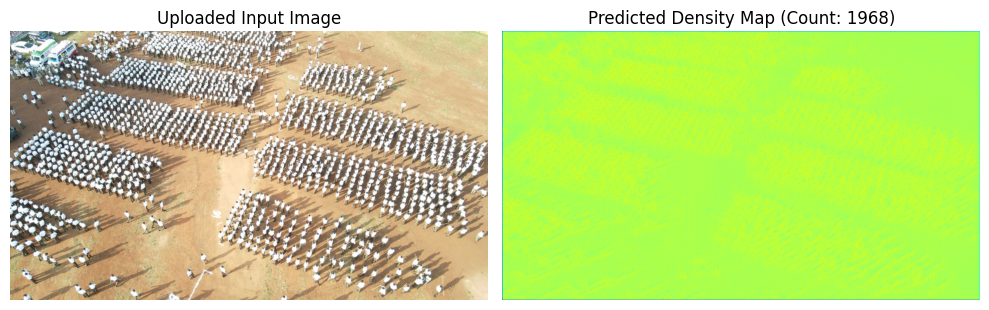

In [22]:
# --- Example Usage with Uploaded Image ---
# Replace with the actual path to your uploaded image file
# After running the file upload cell, you can get the filename from the 'uploaded' dictionary.
# For example, if you uploaded 'my_drone_image.jpg', the path would be '/content/my_drone_image.jpg'
if 'uploaded' in locals() and uploaded:
    uploaded_image_filename = list(uploaded.keys())[0]
    uploaded_image_path = os.path.join('/content/', uploaded_image_filename)

    print(f"\nProcessing uploaded image: {uploaded_image_filename}")

    # Check if the uploaded image exists
    if not os.path.exists(uploaded_image_path):
        print(f"Error: Uploaded input image not found at '{uploaded_image_path}'")
    else:
        # Perform inference
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # Assuming 'model' and 'inference_transform' are already defined from previous steps
        # If not, you would need to load the model and define the transform here.

        estimated_count, predicted_density_map = predict_crowd_count(uploaded_image_path, model, inference_transform, device)

        if estimated_count is not None:
            print(f"Estimated crowd count for '{uploaded_image_filename}': {estimated_count:.2f}")

            # Optional: Display the predicted density map
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(Image.open(uploaded_image_path).convert('RGB'))
            plt.title('Uploaded Input Image')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(predicted_density_map, cmap='jet')
            plt.title(f'Predicted Density Map (Count: {estimated_count:.0f})')
            plt.axis('off')

            plt.tight_layout()
            plt.show()
else:
    print("No file was uploaded. Please run the file upload cell first.")

First, we need to ensure the trained model is loaded and in evaluation mode.

First, we'll initialize a Git repository in the `/content` directory (or a subdirectory if you prefer) and add the necessary files.

In [20]:
import torch
import os

# Define the path where you want to save the model weights
model_save_path = 'crowd_counting_model.pth'

try:
    # Save the model's state dictionary
    torch.save(model.state_dict(), model_save_path)
    print(f"Model weights saved successfully to '{model_save_path}'")
except Exception as e:
    print(f"Error saving model weights: {e}")

Model weights saved successfully to 'crowd_counting_model.pth'


Use the following format for the push command, replacing the placeholders with your Personal Access Token, GitHub username, and repository name:

Now, push your committed changes to your GitHub repository. You might be prompted for your GitHub username and password or a personal access token.

In [14]:
import torch

# Assuming the 'model' object from training is still available.
# If the session has reset, you would need to redefine the model architecture
# and load the state dictionary from your saved weights.
# For example:
# model = CrowdCountingCNN() # Redefine your model
# model.load_state_dict(torch.load('crowd_counting_model.pth')) # Load saved weights

# Set the model to evaluation mode
model.eval()

print("Model is ready for inference.")

Model is ready for inference.


Now, we will load a sample image (replace this with your drone image), perform inference, and create the color-coded density visualization.

Estimated crowd count for '/content/crowd_counting_dataset/val/images/1.jpg': 2089.29


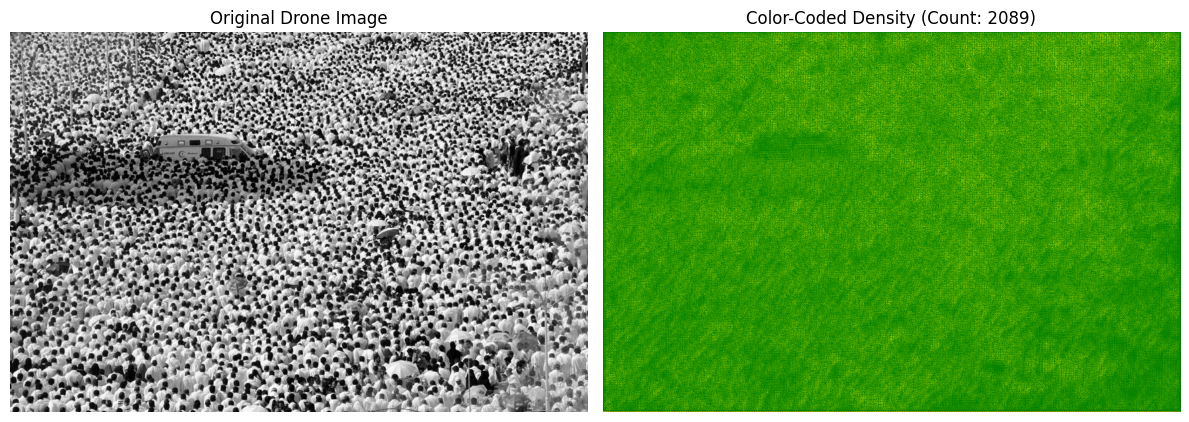

In [15]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the same transformations used during training for input images
inference_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to perform inference on a single image and get the density map
def get_density_map(image_path, model, transform, device):
    # Load the image
    try:
        img = Image.open(image_path).convert('RGB')
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None, None

    # Preprocess the image
    img_tensor = transform(img).unsqueeze(0).to(device) # Add batch dimension and move to device

    # Get model prediction
    model.eval() # Ensure model is in evaluation mode
    with torch.no_grad(): # Disable gradient calculation
        predicted_density_map = model(img_tensor)

    # Convert predicted density map to numpy array
    predicted_density_map_np = predicted_density_map.squeeze(0).squeeze(0).cpu().numpy() # Remove batch and channel dims

    return np.array(img), predicted_density_map_np # Return original image (as numpy) and density map


# Function to create a color-coded visualization from the density map
def create_color_coded_density_map(density_map, max_density=None):
    # Normalize density map to [0, 1] for colormapping
    if max_density is None:
         # Using the maximum value in the current density map for normalization
        normalized_density_map = density_map / (np.max(density_map) + 1e-6) # Add epsilon to avoid division by zero
    else:
        # Using a predefined maximum density for consistent color scaling across images
        normalized_density_map = density_map / (max_density + 1e-6)

    normalized_density_map = np.clip(normalized_density_map, 0, 1) # Clip values to [0, 1]

    # Create a colormap (e.g., from green to yellow to red)
    # You can define custom color stops for more control
    colors = ["green", "yellow", "red"]
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_density_cmap", colors)

    # Apply the colormap to the normalized density map
    color_coded_map = cmap(normalized_density_map)

    # The colormap outputs RGBA, we can use the RGB part
    return color_coded_map[:, :, :3] # Return RGB channels

# --- Example Usage ---
# Replace with the path to your input drone image
input_drone_image_path = '/content/crowd_counting_dataset/val/images/1.jpg' # Example using an image from validation set

# Check if the input image exists
if not os.path.exists(input_drone_image_path):
    print(f"Error: Input image not found at '{input_drone_image_path}'")
else:
    # Perform inference to get the density map
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    original_img_np, predicted_density_map = get_density_map(input_drone_image_path, model, inference_transform, device)

    if predicted_density_map is not None:
        # Calculate estimated crowd count
        estimated_count = np.sum(predicted_density_map)
        print(f"Estimated crowd count for '{input_drone_image_path}': {estimated_count:.2f}")

        # Create the color-coded density map
        # You might need to set a fixed max_density based on your dataset
        # for consistent color scaling across different drone images.
        # For this example, we'll use the max density in the current map.
        color_density_viz = create_color_coded_density_map(predicted_density_map)

        # Display the original image and the color-coded density map
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(original_img_np)
        plt.title('Original Drone Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(color_density_viz)
        plt.title(f'Color-Coded Density (Count: {estimated_count:.0f})')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

To use the trained model for inference on new images, you first need to load the saved model weights.

In [12]:
import torch

# Assuming the trained model weights are saved in the default location after training
# If you saved them elsewhere, update this path
trained_weights_path = 'crowd_counting_model.pth' # Placeholder, update with actual path if saved

# If you didn't explicitly save the model, you can use the model object directly
# if it's still available in the current session after training.
# If the session has reset, you would need to re-define the model architecture
# and load the state dictionary from the saved weights.

# Example of loading saved weights (if you had saved them):
# model = CrowdCountingCNN() # Re-define the model architecture
# model.load_state_dict(torch.load(trained_weights_path))
# model.eval() # Set the model to evaluation mode

# For now, let's assume the 'model' object from the training is still available and trained.
# If not, you'll need to load it.

# Set the model to evaluation mode
model.eval()

print("Model is ready for inference.")

Model is ready for inference.


Now, let's write code to load an input image, preprocess it, and get the crowd count prediction.

Estimated crowd count for '/content/crowd_counting_dataset/val/images/1.jpg': 2089.29


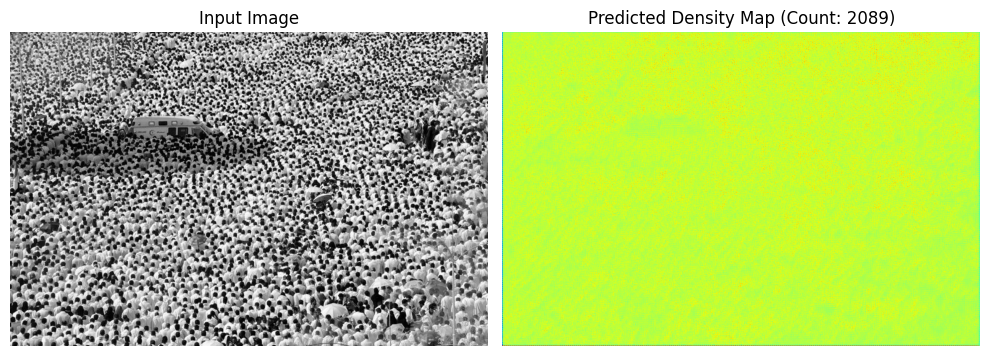

In [13]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Define the same transformations used during training for input images
# Make sure these match the transformations applied in your DataLoader's dataset
inference_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to perform inference on a single image
def predict_crowd_count(image_path, model, transform, device):
    # Load the image
    try:
        img = Image.open(image_path).convert('RGB')
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None, None

    # Preprocess the image
    img_tensor = transform(img).unsqueeze(0).to(device) # Add batch dimension and move to device

    # Get model prediction
    model.eval() # Ensure model is in evaluation mode
    with torch.no_grad(): # Disable gradient calculation
        predicted_density_map = model(img_tensor)

    # Convert predicted density map to numpy array
    predicted_density_map_np = predicted_density_map.squeeze(0).squeeze(0).cpu().numpy() # Remove batch and channel dims

    # Calculate estimated crowd count (sum of the density map)
    estimated_count = np.sum(predicted_density_map_np)

    return estimated_count, predicted_density_map_np

# --- Example Usage ---
# Replace with the path to your input image
input_image_path = '/content/crowd_counting_dataset/val/images/1.jpg' # Example using an image from validation set

# Check if the input image exists
if not os.path.exists(input_image_path):
    print(f"Error: Input image not found at '{input_image_path}'")
else:
    # Perform inference
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    estimated_count, predicted_density_map = predict_crowd_count(input_image_path, model, inference_transform, device)

    if estimated_count is not None:
        print(f"Estimated crowd count for '{input_image_path}': {estimated_count:.2f}")

        # Optional: Display the predicted density map
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(Image.open(input_image_path).convert('RGB'))
        plt.title('Input Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(predicted_density_map, cmap='jet')
        plt.title(f'Predicted Density Map (Count: {estimated_count:.0f})')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

Displaying 3 sample predictions from the validation set:


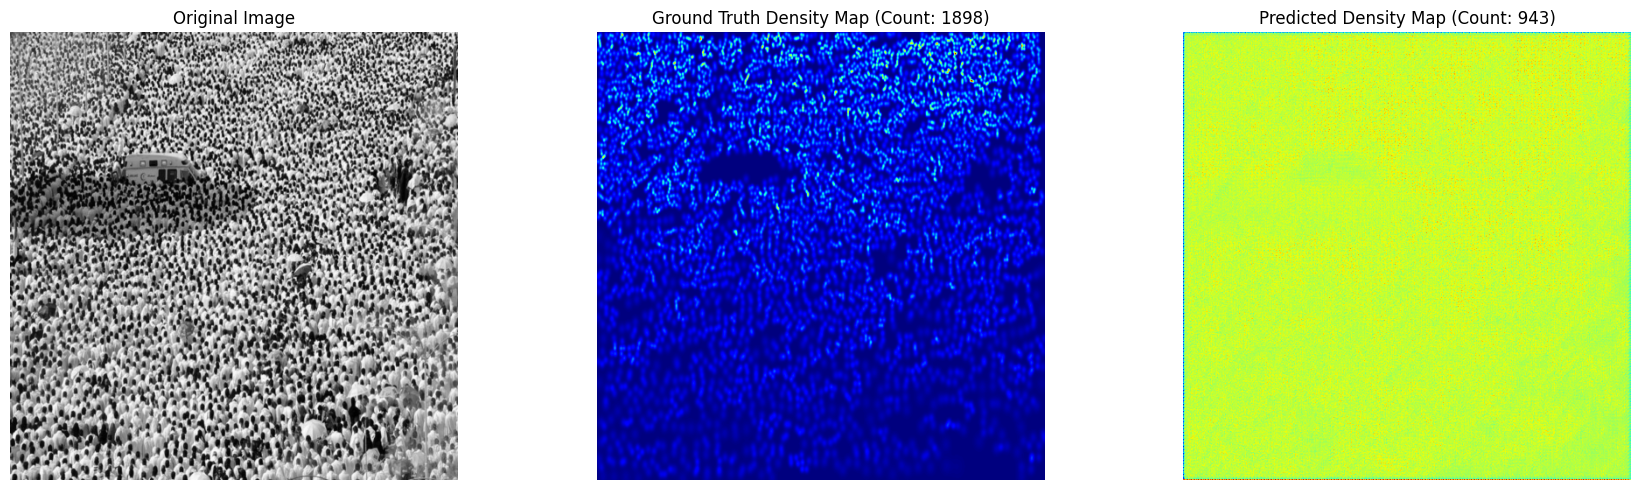

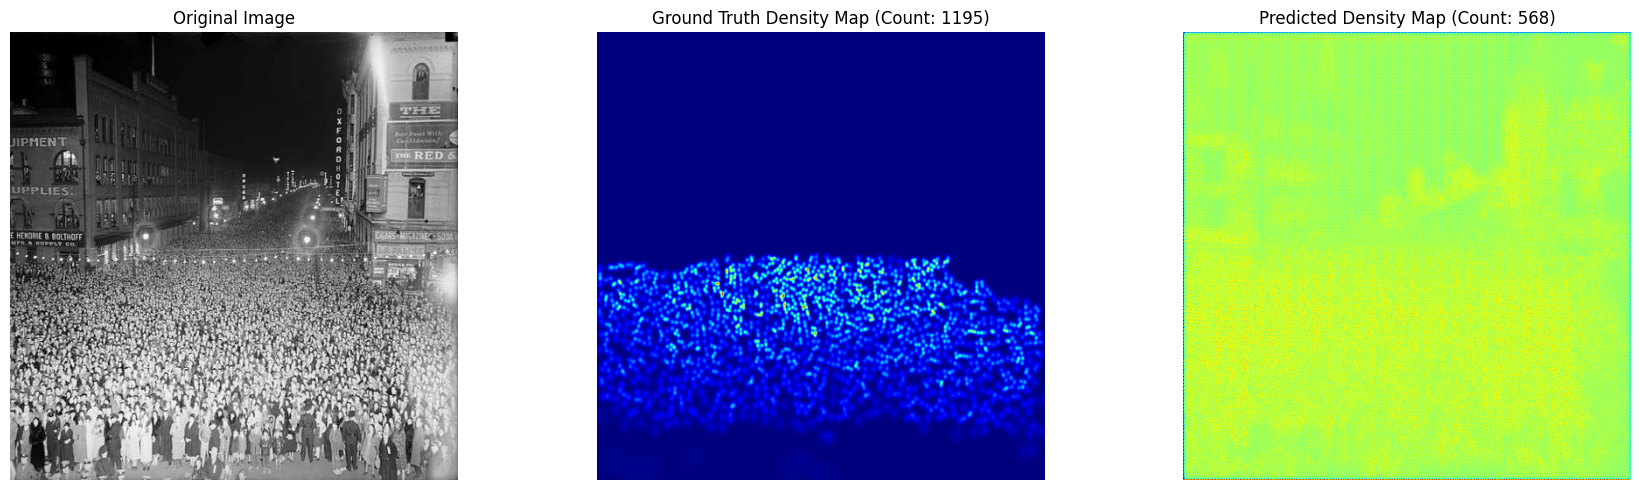

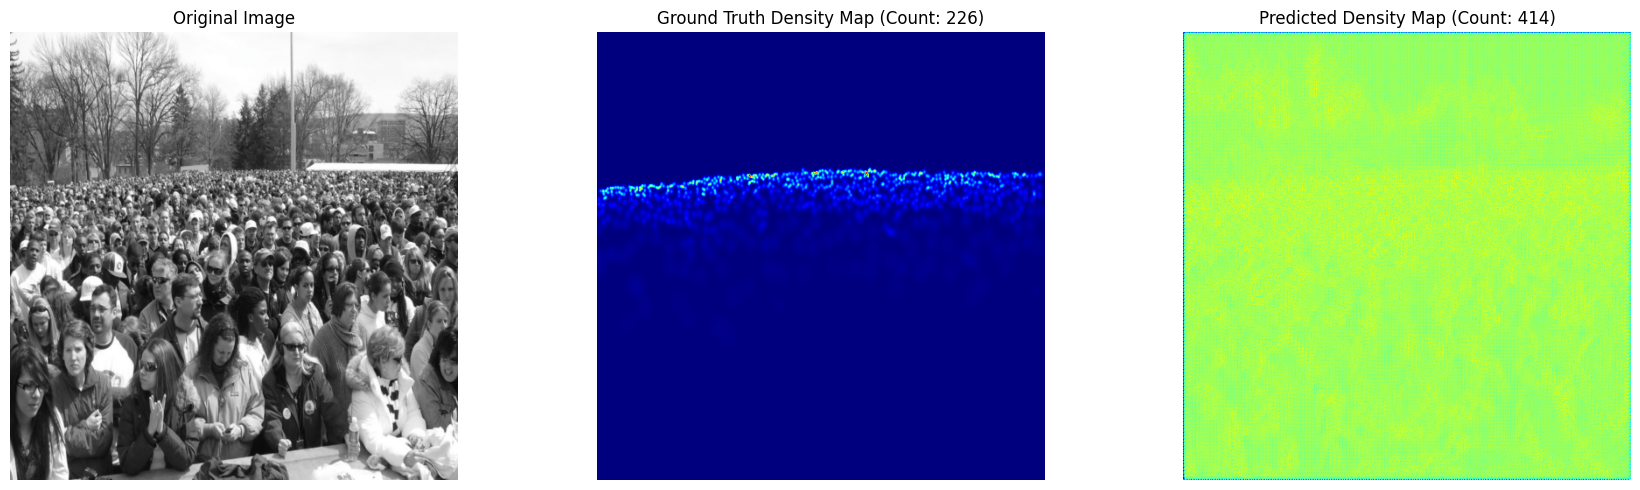


Evaluation display complete.


In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode
model.eval()

# Get a few samples from the validation dataloader
# We can iterate through the dataloader or get a fixed number of samples
num_samples_to_display = 3
displayed_samples = 0

print(f"Displaying {num_samples_to_display} sample predictions from the validation set:")

with torch.no_grad(): # Disable gradient calculation for inference
    for images, density_maps in val_dataloader:
        if images is None or density_maps is None:
            print("Skipping an empty batch from validation dataloader.")
            continue

        # Move data to the appropriate device
        images = images.to(device)
        density_maps = density_maps.to(device)

        # Get model predictions
        predicted_density_maps = model(images)

        # Process and display each sample in the batch
        for i in range(images.size(0)):
            if displayed_samples >= num_samples_to_display:
                break

            img = images[i].cpu().numpy().transpose(1, 2, 0) # Convert to HWC for matplotlib
            gt_density_map = density_maps[i].squeeze().cpu().numpy() # Remove channel dim and move to CPU
            pred_density_map = predicted_density_maps[i].squeeze().cpu().numpy() # Remove channel dim and move to CPU

            # Unnormalize the image for display (optional, but can make it look better)
            # Assuming ImageNet normalization
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            img = std * img + mean
            img = np.clip(img, 0, 1) # Clip values to be in valid image range [0, 1]


            # Calculate estimated count from predicted density map
            estimated_count = np.sum(pred_density_map)
            ground_truth_count = np.sum(gt_density_map)


            plt.figure(figsize=(18, 5))

            # Display original image
            plt.subplot(1, 3, 1)
            plt.imshow(img)
            plt.title('Original Image')
            plt.axis('off')

            # Display ground truth density map
            plt.subplot(1, 3, 2)
            plt.imshow(gt_density_map, cmap='jet')
            plt.title(f'Ground Truth Density Map (Count: {ground_truth_count:.0f})')
            plt.axis('off')

            # Display predicted density map
            plt.subplot(1, 3, 3)
            plt.imshow(pred_density_map, cmap='jet')
            plt.title(f'Predicted Density Map (Count: {estimated_count:.0f})')
            plt.axis('off')

            plt.tight_layout()
            plt.show()

            displayed_samples += 1

        if displayed_samples >= num_samples_to_display:
            break

print("\nEvaluation display complete.")

In [9]:
# Re-run the model definition cell to ensure the updated model is used
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a simple CNN model for crowd counting
class CrowdCountingCNN(nn.Module):
    def __init__(self):
        super(CrowdCountingCNN, self).__init__()
        # Simple CNN layers to extract features
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Upsampling layers to produce a density map
        # We need to upsample by a factor of 4 (due to two max_pool2d with stride 2)
        # We can use ConvTranspose2d with appropriate stride and padding
        # The goal is to get an output density map with the same spatial dimensions as the input image (512x512 in our collate_fn)
        # The input to the deconv layers will be after two max_pool2d with stride 2, so its spatial size will be Input_Size / 4
        # To get back to Input_Size, we need an overall stride of 4 in the deconvolution part.
        # We can achieve this with two ConvTranspose2d layers with stride 2.
        # Let's define deconvolution layers to upsample by a factor of 2 each.

        self.deconv1 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1) # Upsample by 2
        self.deconv2 = nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1) # Upsample by 2
        # Final layer to output 1 channel (density map)
        self.deconv3 = nn.ConvTranspose2d(16, 1, kernel_size=3, padding=1) # Output channel is 1 for density map


    def forward(self, x):
        # Downsampling path
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2) # Output size is Input_Size / 2
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2) # Output size is Input_Size / 4
        x = F.relu(self.conv3(x))
        # Note: In a real model, you might have more layers and different pooling strategies

        # Upsampling path
        # We need to carefully choose kernel_size, stride, and padding for ConvTranspose2d
        # to get the desired output size.
        # Output size of ConvTranspose2d is calculated as:
        # output_size = (input_size - 1) * stride - 2 * padding + kernel_size + output_padding
        # We want to go from Input_Size/4 -> Input_Size/2 -> Input_Size

        # First deconvolution: Input_Size/4 -> Input_Size/2
        # input_size = Input_Size/4
        # stride = 2
        # padding = 1
        # kernel_size = 4
        # output_size = (Input_Size/4 - 1) * 2 - 2 * 1 + 4 + output_padding
        #             = Input_Size/2 - 2 - 2 + 4 + output_padding
        #             = Input_Size/2 + output_padding
        # To get Input_Size/2, output_padding should be 0.
        x = F.relu(self.deconv1(x)) # Output size is Input_Size / 2

        # Second deconvolution: Input_Size/2 -> Input_Size
        # input_size = Input_Size/2
        # stride = 2
        # padding = 1
        # kernel_size = 4
        # output_size = (Input_Size/2 - 1) * 2 - 2 * 1 + 4 + output_padding
        #             = Input_Size - 2 - 2 + 4 + output_padding
        #             = Input_Size + output_padding
        # To get Input_Size, output_padding should be 0.
        x = F.relu(self.deconv2(x)) # Output size is Input_Size

        # Final deconvolution: Output to 1 channel. Ensure spatial size remains Input_Size
        # This layer doesn't change spatial size if kernel_size=3, stride=1, padding=1
        x = self.deconv3(x) # Output size is Input_Size, 1 channel


        # The output density map should ideally have the same spatial dimensions as the input image (512x512)
        # The ConvTranspose2d layers are set up to achieve this.
        # If there's a slight mismatch (e.g., off by 1 pixel), you might need to use output_padding=1 in the deconv layers
        # where the output size calculation results in output_size = (input_size - 1) * stride - 2 * padding + kernel_size + 1
        # or resize the output at the end.
        # Let's re-evaluate the deconv layers to ensure the output size matches the target size (512x512).
        # With input size 512x512, after two max_pool2d with stride 2, spatial size is 128x128.

        # deconv1: Input 128x128, kernel=4, stride=2, padding=1
        # output_size = (128 - 1) * 2 - 2 * 1 + 4 = 127 * 2 - 2 + 4 = 254 - 2 + 4 = 256. Correct.

        # deconv2: Input 256x256, kernel=4, stride=2, padding=1
        # output_size = (256 - 1) * 2 - 2 * 1 + 4 = 255 * 2 - 2 + 4 = 510 - 2 + 4 = 512. Correct.

        # deconv3: Input 512x512, kernel=3, stride=1, padding=1
        # output_size = (512 - 1) * 1 - 2 * 1 + 3 = 511 - 2 + 3 = 512. Correct.

        # The deconvolution layers seem correctly configured to output 512x512.
        # We don't need output_padding or final resizing with these parameters.


        return x

# Instantiate the model
model = CrowdCountingCNN()
print("CrowdCountingCNN model defined:")
print(model)

# Example of a forward pass with dummy data (replace with actual data loading)
# Assuming input size is 512x512 as per custom_collate_fn
# dummy_input = torch.randn(1, 3, 512, 512) # Batch size 1, 3 channels, 512x512 image
# output_density_map = model(dummy_input)
# print(f"Output density map shape for dummy input: {output_density_map.shape}")

CrowdCountingCNN model defined:
CrowdCountingCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (deconv1): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (deconv2): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (deconv3): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [10]:
# Re-run the training loop cell
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm # for displaying progress bars

# Define the loss function (Mean Squared Error is common for density maps)
criterion = nn.MSELoss()

# Define the optimizer (Adam is a good choice)
optimizer = optim.Adam(model.parameters(), lr=0.001) # You can adjust the learning rate

# Define the number of training epochs
num_epochs = 20 # You can adjust the number of epochs

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"Using device: {device}")

# Training loop
print("\nStarting training...")
for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    running_loss = 0.0

    # Use tqdm for a progress bar
    train_dataloader_tqdm = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} [Training]")

    for images, density_maps in train_dataloader_tqdm:
        # Handle potential None values from the dataset (if a sample failed to load)
        if images is None or density_maps is None:
            train_dataloader_tqdm.write("Skipping a batch due to loading error.")
            continue

        # Move data to the appropriate device
        images = images.to(device)
        density_maps = density_maps.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, density_maps)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item() * images.size(0) # Multiply by batch size

        # Update the progress bar description
        train_dataloader_tqdm.set_postfix({'loss': running_loss / ((train_dataloader_tqdm.n + 1) * train_dataloader.batch_size)})


    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}] Training Loss: {epoch_loss:.4f}")

    # Validation loop
    model.eval() # Set the model to evaluation mode
    running_mae = 0.0 # Mean Absolute Error for evaluation
    running_mse = 0.0 # Mean Squared Error for evaluation

    # Use tqdm for a progress bar
    val_dataloader_tqdm = tqdm(val_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} [Validation]")


    with torch.no_grad(): # Disable gradient calculation during validation
        for images, density_maps in val_dataloader_tqdm:
             # Handle potential None values from the dataset
            if images is None or density_maps is None:
                val_dataloader_tqdm.write("Skipping a batch due to loading error.")
                continue

            # Move data to the appropriate device
            images = images.to(device)
            density_maps = density_maps.to(device)

            # Forward pass
            outputs = model(images)

            # Calculate MAE and MSE
            # The sum of the density map is the estimated count
            predicted_counts = torch.sum(outputs, dim=[1, 2, 3])
            ground_truth_counts = torch.sum(density_maps, dim=[1, 2, 3])

            mae = torch.mean(torch.abs(predicted_counts - ground_truth_counts))
            mse = torch.mean((predicted_counts - ground_truth_counts)**2)

            running_mae += mae.item() * images.size(0)
            running_mse += mse.item() * images.size(0)

            # Update the progress bar description
            val_dataloader_tqdm.set_postfix({'mae': running_mae / ((val_dataloader_tqdm.n + 1) * val_dataloader.batch_size),
                                             'mse': running_mse / ((val_dataloader_tqdm.n + 1) * val_dataloader.batch_size)})


    epoch_mae = running_mae / len(val_dataset)
    epoch_mse = running_mse / len(val_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}] Validation MAE: {epoch_mae:.4f}, Validation MSE: {epoch_mse:.4f}")

print("\nTraining finished.")

# You would typically save the model weights after training
# torch.save(model.state_dict(), 'crowd_counting_model.pth')

Using device: cpu

Starting training...


Epoch 1/20 [Training]: 100%|██████████| 5/5 [00:24<00:00,  4.91s/it, loss=0.00265]


Epoch [1/20] Training Loss: 0.0026


Epoch 1/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.48s/it, mae=2.21e+3, mse=8.97e+6]


Epoch [1/20] Validation MAE: 3536.2044, Validation MSE: 14356462.8000


Epoch 2/20 [Training]: 100%|██████████| 5/5 [00:18<00:00,  3.61s/it, loss=0.00031]


Epoch [2/20] Training Loss: 0.0003


Epoch 2/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it, mae=1.38e+3, mse=3.32e+6]


Epoch [2/20] Validation MAE: 2206.9846, Validation MSE: 5311533.1000


Epoch 3/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.57s/it, loss=0.000156]


Epoch [3/20] Training Loss: 0.0002


Epoch 3/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.06s/it, mae=1.01e+3, mse=1.81e+6]


Epoch [3/20] Validation MAE: 1612.6977, Validation MSE: 2900301.3000


Epoch 4/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.53s/it, loss=8.85e-5]


Epoch [4/20] Training Loss: 0.0001


Epoch 4/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.08s/it, mae=303, mse=1.99e+5]


Epoch [4/20] Validation MAE: 484.4733, Validation MSE: 318251.6406


Epoch 5/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.55s/it, loss=5.39e-5]


Epoch [5/20] Training Loss: 0.0001


Epoch 5/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it, mae=215, mse=1.31e+5]


Epoch [5/20] Validation MAE: 344.4982, Validation MSE: 209219.3875


Epoch 6/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.53s/it, loss=5.16e-5]


Epoch [6/20] Training Loss: 0.0001


Epoch 6/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.06s/it, mae=187, mse=7.09e+4]


Epoch [6/20] Validation MAE: 299.9030, Validation MSE: 113432.2250


Epoch 7/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.55s/it, loss=3.87e-5]


Epoch [7/20] Training Loss: 0.0000


Epoch 7/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it, mae=239, mse=1.48e+5]


Epoch [7/20] Validation MAE: 382.4646, Validation MSE: 237537.6063


Epoch 8/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.53s/it, loss=3.63e-5]


Epoch [8/20] Training Loss: 0.0000


Epoch 8/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.07s/it, mae=319, mse=2.44e+5]


Epoch [8/20] Validation MAE: 511.0023, Validation MSE: 390696.8563


Epoch 9/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.46s/it, loss=3.55e-5]


Epoch [9/20] Training Loss: 0.0000


Epoch 9/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it, mae=276, mse=2.06e+5]


Epoch [9/20] Validation MAE: 442.3585, Validation MSE: 328974.1406


Epoch 10/20 [Training]: 100%|██████████| 5/5 [00:16<00:00,  3.39s/it, loss=3.29e-5]


Epoch [10/20] Training Loss: 0.0000


Epoch 10/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.02s/it, mae=220, mse=1.21e+5]


Epoch [10/20] Validation MAE: 351.2723, Validation MSE: 193926.3516


Epoch 11/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.48s/it, loss=3.24e-5]


Epoch [11/20] Training Loss: 0.0000


Epoch 11/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.06s/it, mae=205, mse=9.99e+4]


Epoch [11/20] Validation MAE: 327.9009, Validation MSE: 159815.4281


Epoch 12/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.49s/it, loss=3.17e-5]


Epoch [12/20] Training Loss: 0.0000


Epoch 12/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.06s/it, mae=220, mse=1.31e+5]


Epoch [12/20] Validation MAE: 352.1385, Validation MSE: 209687.8125


Epoch 13/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.42s/it, loss=3.11e-5]


Epoch [13/20] Training Loss: 0.0000


Epoch 13/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it, mae=238, mse=1.68e+5]


Epoch [13/20] Validation MAE: 380.1967, Validation MSE: 268916.9375


Epoch 14/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.48s/it, loss=3.06e-5]


Epoch [14/20] Training Loss: 0.0000


Epoch 14/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it, mae=225, mse=1.5e+5]


Epoch [14/20] Validation MAE: 360.7013, Validation MSE: 239853.7203


Epoch 15/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.49s/it, loss=3.03e-5]


Epoch [15/20] Training Loss: 0.0000


Epoch 15/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.05s/it, mae=236, mse=1.66e+5]


Epoch [15/20] Validation MAE: 377.2114, Validation MSE: 265459.5969


Epoch 16/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.48s/it, loss=2.97e-5]


Epoch [16/20] Training Loss: 0.0000


Epoch 16/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.05s/it, mae=210, mse=1.22e+5]


Epoch [16/20] Validation MAE: 336.4952, Validation MSE: 194588.0016


Epoch 17/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.44s/it, loss=2.96e-5]


Epoch [17/20] Training Loss: 0.0000


Epoch 17/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.06s/it, mae=209, mse=1.19e+5]


Epoch [17/20] Validation MAE: 334.0427, Validation MSE: 189847.7500


Epoch 18/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.55s/it, loss=2.92e-5]


Epoch [18/20] Training Loss: 0.0000


Epoch 18/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.06s/it, mae=231, mse=1.59e+5]


Epoch [18/20] Validation MAE: 369.7417, Validation MSE: 255088.7281


Epoch 19/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.54s/it, loss=2.89e-5]


Epoch [19/20] Training Loss: 0.0000


Epoch 19/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it, mae=217, mse=1.38e+5]


Epoch [19/20] Validation MAE: 347.2543, Validation MSE: 220863.6547


Epoch 20/20 [Training]: 100%|██████████| 5/5 [00:17<00:00,  3.48s/it, loss=2.87e-5]


Epoch [20/20] Training Loss: 0.0000


Epoch 20/20 [Validation]: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it, mae=213, mse=1.3e+5]

Epoch [20/20] Validation MAE: 341.5038, Validation MSE: 207518.4109

Training finished.


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a simple CNN model for crowd counting
class CrowdCountingCNN(nn.Module):
    def __init__(self):
        super(CrowdCountingCNN, self).__init__()
        # Simple CNN layers to extract features
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Upsampling layers to produce a density map (assuming output resolution is the same as input for simplicity)
        # In more complex models, you might use transposed convolutions or other upsampling methods
        # and the output resolution might be different.
        self.deconv1 = nn.ConvTranspose2d(64, 32, kernel_size=3, padding=1)
        self.deconv2 = nn.ConvTranspose2d(32, 16, kernel_size=3, padding=1)
        self.deconv3 = nn.ConvTranspose2d(16, 1, kernel_size=3, padding=1) # Output channel is 1 for density map


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2) # Example pooling
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2) # Example pooling
        x = F.relu(self.conv3(x))
        # Note: In a real model, you might have more layers and different pooling strategies

        # Simple upsampling (might need adjustment based on desired output resolution)
        # For this basic example, let's assume we need to upsample by the same factor as pooling
        x = F.relu(self.deconv1(x))
        # Adjust output_padding to match the pooling stride for correct size
        x = F.relu(self.deconv2(x, output_padding=1)) # Assuming stride of 2 in conv2
        x = self.deconv3(x, output_padding=1) # Assuming stride of 2 in conv1

        # Ensure the output density map has the same spatial dimensions as the input image
        # This is a simplified approach; more robust methods might involve cropping or interpolation.
        # If the deconvolution layers don't perfectly restore the size, you might need to resize here.
        # For instance, if the input was (H, W) and after pooling it became (H', W'),
        # deconvolution should ideally bring it back to (H, W).
        # Simple check and potential resize (this is a basic example and might need refinement)
        # expected_height = x.size(2) * 4 # Assuming two max_pool2d with stride 2
        # expected_width = x.size(3) * 4 # Assuming two max_pool2d with stride 2
        # if x.size(2) != expected_height or x.size(3) != expected_width:
        #     print("Warning: Output size mismatch. Consider adjusting deconvolution layers or resizing.")
            # x = F.interpolate(x, size=(expected_height, expected_width), mode='bilinear', align_corners=False)


        return x

# Instantiate the model
model = CrowdCountingCNN()
print("CrowdCountingCNN model defined:")
print(model)

# Example of a forward pass with dummy data (replace with actual data loading)
# dummy_input = torch.randn(1, 3, 256, 256) # Batch size 1, 3 channels, 256x256 image
# output_density_map = model(dummy_input)
# print(f"Output density map shape for dummy input: {output_density_map.shape}")

CrowdCountingCNN model defined:
CrowdCountingCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (deconv1): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (deconv2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (deconv3): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
import os
import h5py
from PIL import Image
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch # Import torch

# Define the paths to the dataset directories
dataset_base_dir = '/content/crowd_counting_dataset'
train_images_dir = os.path.join(dataset_base_dir, 'train', 'images')
train_labels_h5_dir = os.path.join(dataset_base_dir, 'train', 'labels_h5')
val_images_dir = os.path.join(dataset_base_dir, 'val', 'images')
val_labels_h5_dir = os.path.join(dataset_base_dir, 'val', 'labels_h5')

# Define image transformations (you might need more depending on your model)
# For a basic example, let's just convert to Tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # ImageNet standards
])

# Custom Dataset class for loading images and density maps
class CrowdDataset(Dataset):
    def __init__(self, image_dir, density_map_dir, transform=None):
        self.image_dir = image_dir
        self.density_map_dir = density_map_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
        self.image_files.sort() # Ensure consistent order

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_dir, img_name)
        # Assuming density map file has the same base name but with .h5 extension
        density_map_name = img_name.replace('.jpg', '.h5')
        density_map_path = os.path.join(self.density_map_dir, density_map_name)

        # Load image
        try:
            img = Image.open(img_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return None, None # Return None if image loading fails

        # Load density map
        density_map = None
        if os.path.exists(density_map_path):
            try:
                with h5py.File(density_map_path, 'r') as f:
                    density_map = np.array(f['density'])
                    # Convert numpy array to tensor and ensure correct shape
                    density_map = torch.from_numpy(density_map).unsqueeze(0) # Add channel dimension
            except Exception as e:
                print(f"Error loading density map {density_map_path}: {e}")
                # Handle missing or corrupted density map (e.g., return None or a zero tensor)
                return None, None # Return None if density map loading fails
        else:
             print(f"Density map not found for {img_name}")
             return None, None # Return None if density map is not found

        # Apply image transformations
        if self.transform:
            img = self.transform(img)

        return img, density_map

# Define a custom collate function to handle varying image sizes
def custom_collate_fn(batch):
    # Filter out samples where loading failed (returned None, None)
    batch = [(img, dm) for img, dm in batch if img is not None and dm is not None]

    if not batch:
        return None, None # Return None if the batch is empty after filtering

    # Assuming all images in a batch will be resized to the same size for simplicity
    # You might choose a fixed size or resize to the largest size in the batch
    # Let's resize to a common size for demonstration (e.g., 512x512)
    target_size = (512, 512) # (height, width)

    processed_images = []
    processed_density_maps = []

    for img, density_map in batch:
        # Resize image
        # Use transforms.functional.resize for tensor input
        img_resized = transforms.functional.resize(img, target_size)

        # Resize density map (needs careful handling as it's a single channel tensor)
        # Use interpolation appropriate for density maps (e.g., bilinear or nearest)
        # Bilinear interpolation is generally preferred for density maps
        density_map_resized = transforms.functional.resize(density_map, target_size, interpolation=transforms.functional.InterpolationMode.BILINEAR)

        # Ensure the density map values are non-negative after resizing
        density_map_resized[density_map_resized < 0] = 0

        processed_images.append(img_resized)
        processed_density_maps.append(density_map_resized)

    # Stack the processed images and density maps into batches
    images_batch = torch.stack(processed_images, 0)
    density_maps_batch = torch.stack(processed_density_maps, 0)

    # Add print statements to check shapes after resizing and before stacking
    # print("Shapes after resizing within collate_fn:")
    # for i, (img_r, dm_r) in enumerate(zip(processed_images, processed_density_maps)):
    #     print(f"  Sample {i}: Image shape: {img_r.shape}, Density map shape: {dm_r.shape}")
    # print(f"Shape of images_batch: {images_batch.shape}")
    # print(f"Shape of density_maps_batch: {density_maps_batch.shape}")


    return images_batch, density_maps_batch


# Create dataset instances
train_dataset = CrowdDataset(train_images_dir, train_labels_h5_dir, transform=transform)
val_dataset = CrowdDataset(val_images_dir, val_labels_h5_dir, transform=transform)


# Create DataLoaders (for batching and shuffling)
# Use the custom collate function
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=custom_collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False, collate_fn=custom_collate_fn)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")

# Example of iterating through the dataloader with custom collate function
# for images, density_maps in train_dataloader:
#     if images is not None and density_maps is not None:
#         print(f"Batch of images shape: {images.shape}")
#         print(f"Batch of density maps shape: {density_maps.shape}")
#         # You can add a break here to just see the first batch
#         break
#     else:
#         print("Skipping an empty batch.")

Number of training samples: 40
Number of validation samples: 10


In [2]:
import h5py
import scipy.io
import os
import random

# Define the paths to the dataset directories
dataset_base_dir = '/content/crowd_counting_dataset'
train_labels_h5_dir = os.path.join(dataset_base_dir, 'train', 'labels_h5')
train_labels_mat_dir = os.path.join(dataset_base_dir, 'train', 'labels_mat')

# --- Inspect a sample .h5 file ---

# Get a list of all .h5 files in the training labels directory
h5_files = [f for f in os.listdir(train_labels_h5_dir) if f.endswith('.h5')]

if h5_files:
    # Select a random .h5 file
    sample_h5_file = random.choice(h5_files)
    sample_h5_path = os.path.join(train_labels_h5_dir, sample_h5_file)

    print(f"Inspecting sample .h5 file: {sample_h5_file}")

    try:
        with h5py.File(sample_h5_path, 'r') as f:
            print("Keys in the .h5 file:", list(f.keys()))
            # You can further inspect the data within each key, e.g.:
            # for key in f.keys():
            #     print(f"Data in key '{key}':", f[key][:].shape) # Print shape of the data
            #     # print(f"Sample data from key '{key}':", f[key][:].flatten()[:10]) # Print first 10 elements
    except Exception as e:
        print(f"Error reading .h5 file {sample_h5_file}: {e}")
else:
    print("No .h5 files found in the training labels directory.")

print("-" * 30)

# --- Inspect a sample .mat file ---

# Get a list of all .mat files in the training labels directory
mat_files = [f for f in os.listdir(train_labels_mat_dir) if f.endswith('.mat')]

if mat_files:
    # Select a random .mat file
    sample_mat_file = random.choice(mat_files)
    sample_mat_path = os.path.join(train_labels_mat_dir, sample_mat_file)

    print(f"Inspecting sample .mat file: {sample_mat_file}")

    try:
        mat_content = scipy.io.loadmat(sample_mat_path)
        print("Keys in the .mat file:", mat_content.keys())
        # You can further inspect the data within each key, e.g.:
        # for key in mat_content.keys():
        #     if not key.startswith('__'): # Ignore
        #          print(f"Data in key '{key}':", mat_content[key].shape) # Print shape of the data
                 # print(f"Sample data from key '{key}':", mat_content[key].flatten()[:10]) # Print first 10 elements
    except Exception as e:
        print(f"Error reading .mat file {sample_mat_file}: {e}")
else:
    print("No .mat files found in the training labels directory.")

Inspecting sample .h5 file: 41.h5
Keys in the .h5 file: ['density']
------------------------------
Inspecting sample .mat file: 43_ann.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'annPoints'])


In [1]:
import os
import shutil
import random

# List of files provided by the user
provided_files = [
    "/content/3_ann.mat", "/content/4.h5", "/content/4.jpg", "/content/4_ann.mat",
    "/content/5.h5", "/content/5.jpg", "/content/5_ann.mat", "/content/6.h5",
    "/content/6.jpg", "/content/6_ann.mat", "/content/7.h5", "/content/7.jpg",
    "/content/7_ann.mat", "/content/8.h5", "/content/8.jpg", "/content/8_ann.mat",
    "/content/9.h5", "/content/9.jpg", "/content/9_ann.mat", "/content/39.h5",
    "/content/39.jpg", "/content/39_ann.mat", "/content/40.h5", "/content/40.jpg",
    "/content/40_ann.mat", "/content/41.h5", "/content/41.jpg", "/content/41_ann.mat",
    "/content/42.h5", "/content/42.jpg", "/content/42_ann.mat", "/content/43.h5",
    "/content/43.jpg", "/content/43_ann.mat", "/content/44.h5", "/content/44.jpg",
    "/content/44_ann.mat", "/content/45.h5", "/content/45.jpg", "/content/45_ann.mat",
    "/content/46.h5", "/content/46.jpg", "/content/46_ann.mat", "/content/47.h5",
    "/content/47.jpg", "/content/47_ann.mat", "/content/48.h5", "/content/48.jpg",
    "/content/48_ann.mat", "/content/49.h5", "/content/49.jpg", "/content/49_ann.mat",
    "/content/50.h5", "/content/50.jpg", "/content/50_ann.mat", "/content/2_ann.mat",
    "/content/3.h5", "/content/3.jpg", "/content/21.h5", "/content/21.jpg",
    "/content/21_ann.mat", "/content/22.h5", "/content/22.jpg", "/content/22_ann.mat",
    "/content/23.h5", "/content/23.jpg", "/content/23_ann.mat", "/content/24.h5",
    "/content/24.jpg", "/content/24_ann.mat", "/content/25.h5", "/content/25.jpg",
    "/content/25_ann.mat", "/content/26.h5", "/content/26.jpg", "/content/26_ann.mat",
    "/content/27.h5", "/content/27.jpg", "/content/27_ann.mat", "/content/28.h5",
    "/content/28.jpg", "/content/28_ann.mat", "/content/29.h5", "/content/29.jpg",
    "/content/29_ann.mat", "/content/30.h5", "/content/30.jpg", "/content/30_ann.mat",
    "/content/31.h5", "/content/31.jpg", "/content/31_ann.mat", "/content/32.h5",
    "/content/32.jpg", "/content/32_ann.mat", "/content/33.h5", "/content/33.jpg",
    "/content/33_ann.mat", "/content/34.h5", "/content/34.jpg", "/content/34_ann.mat",
    "/content/35.h5", "/content/35.jpg", "/content/35_ann.mat", "/content/36.h5",
    "/content/36.jpg", "/content/36_ann.mat", "/content/37.h5", "/content/37.jpg",
    "/content/37_ann.mat", "/content/38.h5", "/content/38.jpg", "/content/38_ann.mat",
    "/content/1.h5", "/content/1.jpg", "/content/1_ann.mat", "/content/2.h5",
    "/content/2.jpg", "/content/10.h5", "/content/10.jpg", "/content/10_ann.mat",
    "/content/11.h5", "/content/11.jpg", "/content/11_ann.mat", "/content/12.h5",
    "/content/12.jpg", "/content/12_ann.mat", "/content/13.h5", "/content/13.jpg",
    "/content/13_ann.mat", "/content/14.h5", "/content/14.jpg", "/content/14_ann.mat",
    "/content/15.h5", "/content/15.jpg", "/content/15_ann.mat", "/content/16.h5",
    "/content/16.jpg", "/content/16_ann.mat", "/content/17.h5", "/content/17.jpg",
    "/content/17_ann.mat", "/content/18.h5", "/content/18.jpg", "/content/18_ann.mat",
    "/content/19.h5", "/content/19.jpg", "/content/19_ann.mat", "/content/20.h5",
    "/content/20.jpg", "/content/20_ann.mat"
]

# Define the base directory for the new dataset
dataset_base_dir = '/content/crowd_counting_dataset'
train_dir = os.path.join(dataset_base_dir, 'train')
val_dir = os.path.join(dataset_base_dir, 'val')
train_images_dir = os.path.join(train_dir, 'images')
train_labels_h5_dir = os.path.join(train_dir, 'labels_h5')
train_labels_mat_dir = os.path.join(train_dir, 'labels_mat')
val_images_dir = os.path.join(val_dir, 'images')
val_labels_h5_dir = os.path.join(val_dir, 'labels_h5')
val_labels_mat_dir = os.path.join(val_dir, 'labels_mat')


# Create directories
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_h5_dir, exist_ok=True)
os.makedirs(train_labels_mat_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_h5_dir, exist_ok=True)
os.makedirs(val_labels_mat_dir, exist_ok=True)

# Group files by their base name
file_groups = {}
for file_path in provided_files:
    directory, filename = os.path.split(file_path)
    base_name, ext = os.path.splitext(filename)
    # Remove _ann from base_name if it exists
    if base_name.endswith('_ann'):
        base_name = base_name[:-4]

    if base_name not in file_groups:
        file_groups[base_name] = []
    file_groups[base_name].append(file_path)

# Get the list of base names and shuffle them for splitting
base_names = list(file_groups.keys())
random.shuffle(base_names)

# Define split ratio (e.g., 80% train, 20% val)
train_ratio = 0.8
train_size = int(len(base_names) * train_ratio)

# Split base names into train and validation sets
train_base_names = base_names[:train_size]
val_base_names = base_names[train_size:]

print(f"Splitting {len(base_names)} file groups: {len(train_base_names)} for training, {len(val_base_names)} for validation.")

# Function to copy files to the appropriate directory
def copy_files(base_names_list, image_dest_dir, h5_dest_dir, mat_dest_dir):
    for base_name in base_names_list:
        if base_name in file_groups:
            for file_path in file_groups[base_name]:
                filename = os.path.basename(file_path)
                if filename.endswith('.jpg'):
                    shutil.copy(file_path, os.path.join(image_dest_dir, filename))
                elif filename.endswith('.h5'):
                    shutil.copy(file_path, os.path.join(h5_dest_dir, filename))
                elif filename.endswith('.mat'):
                    shutil.copy(file_path, os.path.join(mat_dest_dir, filename))

# Copy files to train and validation directories
print("Copying training files...")
copy_files(train_base_names, train_images_dir, train_labels_h5_dir, train_labels_mat_dir)

print("Copying validation files...")
copy_files(val_base_names, val_images_dir, val_labels_h5_dir, val_labels_mat_dir)

print("\nDataset organization complete.")
print(f"Dataset created at: {dataset_base_dir}")

# Display the structure of the created dataset directory
print("\nDataset directory structure:")
for root, dirs, files in os.walk(dataset_base_dir):
    level = root.replace(dataset_base_dir, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')

Splitting 50 file groups: 40 for training, 10 for validation.
Copying training files...
Copying validation files...

Dataset organization complete.
Dataset created at: /content/crowd_counting_dataset

Dataset directory structure:
crowd_counting_dataset/
    val/
        labels_mat/
            15_ann.mat
            19_ann.mat
            6_ann.mat
            1_ann.mat
            46_ann.mat
            2_ann.mat
            44_ann.mat
            25_ann.mat
            18_ann.mat
            5_ann.mat
        images/
            44.jpg
            25.jpg
            18.jpg
            15.jpg
            2.jpg
            19.jpg
            1.jpg
            46.jpg
            5.jpg
            6.jpg
        labels_h5/
            18.h5
            19.h5
            2.h5
            44.h5
            15.h5
            1.h5
            5.h5
            46.h5
            25.h5
            6.h5
    train/
        labels_mat/
            3_ann.mat
            23_ann.mat
            50_ann